#Brandon Luy
#11532759
#CPTS 437
#Assignment 4




1.   

![](https://drive.google.com/uc?export=view&id=1yAWAitoOljz3a2LnuybqJE7TYo9PypgS)

2. Knowing that we have a classification problem to output 4 values that where each target is a y that vector with 3 0 values and 1 1-value. The problem that may arise here can be from the use of encoding the values using (1,2,3,4), because the values encoded onto the class that X is belonging to will also output to 1,2,3,4. Thus, can result in a regression problem because the encoded variables will correlate with the outputted variables.




3. Starting: w1 = 2.0, w2 = 2.0, bias = 0.0

![](https://drive.google.com/uc?export=view&id=1gTEAomTQosNYu588Dep13cYn7aJpanWK)

Ending: w1 = 3.0, w3 = 3.0, bias = 1/0

4.

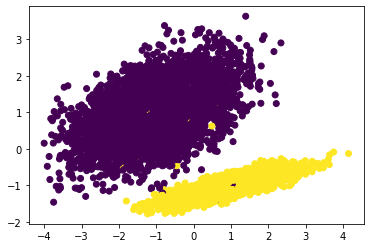

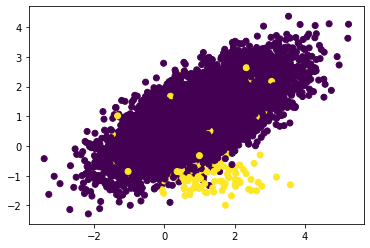

Balanced: accuracy 0.9872 f1_micro 0.9872 f1_macro 0.9871999994880001
Balanced: accuracy 0.9836 f1_micro 0.9836 f1_macro 0.7050612213774504


ValueError: ignored

In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
#matplot library function
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
import matplotlib.pyplot as plt
#numpy
import numpy as np
#pandas library function
import pandas as pd
#decision tree classifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#kmeans
from sklearn.cluster import KMeans
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE


def create_data(type):
  if type == 'balanced':
    weight = 0.50
  else:
    weight = 0.99
  X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, weights=[weight])
  plt.scatter(X[:,0], X[:,1], marker='o', c=y)
  plt.show()
  return X, y

def imbalanced_eval(X, y, clf):
  prediction = cross_val_predict(clf, X, y, cv = 3)
  accuracy = accuracy_score(y, prediction)
  f1_micro = f1_score(y, prediction, average = 'micro')
  f1_macro = f1_score(y, prediction, average='macro')
  print('Balanced: accuracy', accuracy, 'f1_micro', f1_micro, 'f1_macro', f1_macro)

def balanced_eval(X, y, clf):
  prediction = cross_val_predict(clf, X, y, cv = 3)
  accuracy = accuracy_score(y, prediction)
  f1_micro = f1_score(y, prediction, average = 'micro')
  f1_macro = f1_score(y, prediction, average='macro')
  print('Balanced: accuracy', accuracy, 'f1_micro', f1_micro, 'f1_macro', f1_macro)

def data_cluster(X,y):
  n = len(y)
  occurrence = Counter(y)
  majority = occurrence.most_common(1)[0][0]
  minority = 1 if majority == 0 else 0
  k = occurrence[majority] // occurrence[minority]
  cluster_clf = KMeans(n_clusters = k)
  cluster_clf.fit(X[y==majority])
  y_new = np.zeros(n)
  for i in range(n):
    if y[i] == minority:
      y_new[i] = 0
    else:
      y_new[i] = cluster_clf.predict(X[i])[0]+1
  print('y new', np.shape(y_new), y_new)
  clf = DecisionTreeClassifier()
  prediction = cross_val_predict(clf, X, y_new, cv=3)
  for i in range(n):
    if prediction[i]==0:
      prediction[i]=minority
    else:
      prediction[i]=majority
  accuracy = accuracy_score(y, prediction)
  f1_macro = f1_score(y, prediction, average='macro')
  f1_micro = f1_score(y, prediction, average='micro')
  print('reshape balanced, accuracy', accuracy, 'f1_micro', f1_micro, 'f1_macro', f1_macro)


def balanced_weight(X, y):
  clf = DecisionTreeClassifier(class_weight='balanced')
  prediction = cross_val_predict(clf, X, y, cv=3)
  accuracy = accuracy_score(y, predicted)
  f1_micro = f1_score(y, prediction, average='micro')
  f1_macro = f1_score(y, prediction, average='macro')
  print('Balance with weighting: accuracy', accuracy,
        'f1_micro', f1_micro, 'f1_macro', f1_macro)



def main():
  X_b, y_b = create_data('balanced')
  X_i, y_i = create_data('imbalanced')
  clf = DecisionTreeClassifier()
  balanced_eval(X_b, y_b, clf)
  imbalanced_eval(X_i, y_i, clf)
  data_cluster(X_i,y_i)
  balanced_weight(X_i,y_i)



  
if __name__ == "__main__":
  main()